In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

C:\Users\hubin\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 重新生成适合K-means解决的三维数据集
X_kmeans_3d, y_kmeans_3d = make_blobs(n_samples=300, n_features=3, centers=4,
                                      cluster_std=0.6, random_state=0)

# 拉伸三维数据
rng = np.random.RandomState(13)
X_stretch_3d = np.dot(X_kmeans_3d, rng.randn(3, 3))

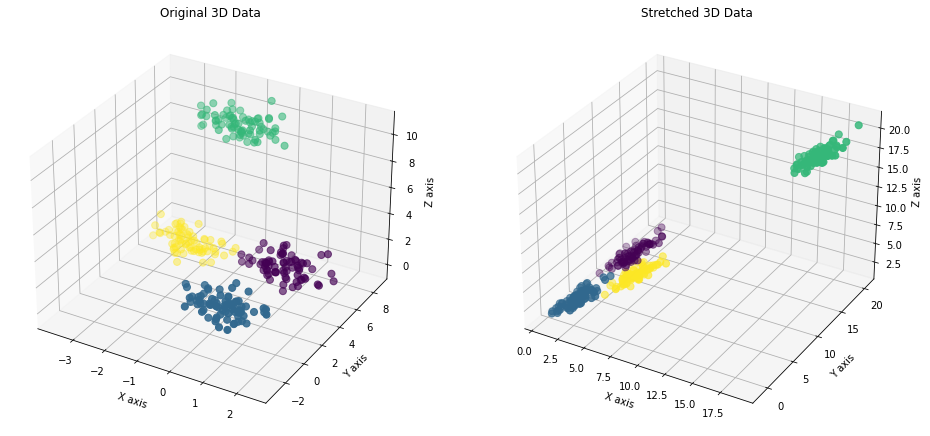

In [3]:
# 绘制原始数据
fig = plt.figure(figsize=(16, 8))

# 绘制原始三维数据
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_kmeans_3d[:, 0], X_kmeans_3d[:, 1], X_kmeans_3d[:, 2], c=y_kmeans_3d, cmap='viridis', s=50)
ax.set_title('Original 3D Data')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# 绘制拉伸后的三维数据
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_stretch_3d[:, 0], X_stretch_3d[:, 1], X_stretch_3d[:, 2], c=y_kmeans_3d, cmap='viridis', s=50)
ax2.set_title('Stretched 3D Data')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')

plt.show()

C:\Users\hubin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hubin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-mean for K-mean Data: Homogeneity score = 1.000
K-mean for K-mean Data: Completeness score = 1.000
K-mean for K-mean Data: V-measure score = 1.000
K-mean for GMM Data: Homogeneity score = 0.821
K-mean for GMM Data: Completeness score = 0.822
K-mean for GMM Data: V-measure score = 0.821
GMM for K-mean Data: Homogeneity score = 1.000
GMM for K-mean Data: Completeness score = 1.000
GMM for K-mean Data: V-measure score = 1.000
GMM for GMM Data: Homogeneity score = 1.000
GMM for GMM Data: Completeness score = 1.000
GMM for GMM Data: V-measure score = 1.000


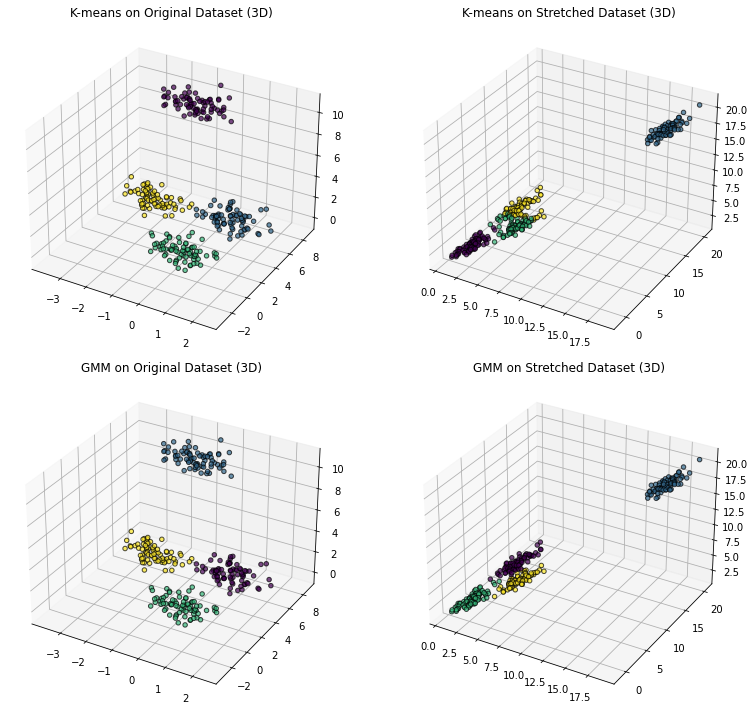

In [4]:
# 使用K-means和GMM聚类算法
centers = 4
kmeans = KMeans(n_clusters=centers, random_state=0)
gmm = GaussianMixture(n_components=centers, n_init=20)

# 对三维数据集应用K-means聚类
y_kmeans_kmeans_3d = kmeans.fit_predict(X_kmeans_3d)
y_stretch_kmeans_3d = kmeans.fit_predict(X_stretch_3d)

print('K-mean for K-mean Data: Homogeneity score = %.3f' % metrics.homogeneity_score(y_kmeans_3d, y_kmeans_kmeans_3d))
print('K-mean for K-mean Data: Completeness score = %.3f' % metrics.completeness_score(y_kmeans_3d, y_kmeans_kmeans_3d))
print('K-mean for K-mean Data: V-measure score = %.3f' % metrics.v_measure_score(y_kmeans_3d, y_kmeans_kmeans_3d))

print('K-mean for GMM Data: Homogeneity score = %.3f' % metrics.homogeneity_score(y_kmeans_3d, y_stretch_kmeans_3d))
print('K-mean for GMM Data: Completeness score = %.3f' % metrics.completeness_score(y_kmeans_3d, y_stretch_kmeans_3d))
print('K-mean for GMM Data: V-measure score = %.3f' % metrics.v_measure_score(y_kmeans_3d, y_stretch_kmeans_3d))


# 对三维数据集应用GMM聚类
y_kmeans_gmm_3d = gmm.fit_predict(X_kmeans_3d)
y_stretch_gmm_3d = gmm.fit_predict(X_stretch_3d)

print('GMM for K-mean Data: Homogeneity score = %.3f' % metrics.homogeneity_score(y_kmeans_3d, y_kmeans_gmm_3d))
print('GMM for K-mean Data: Completeness score = %.3f' % metrics.completeness_score(y_kmeans_3d, y_kmeans_gmm_3d))
print('GMM for K-mean Data: V-measure score = %.3f' % metrics.v_measure_score(y_kmeans_3d, y_kmeans_gmm_3d))

print('GMM for GMM Data: Homogeneity score = %.3f' % metrics.homogeneity_score(y_kmeans_3d, y_stretch_gmm_3d))
print('GMM for GMM Data: Completeness score = %.3f' % metrics.completeness_score(y_kmeans_3d, y_stretch_gmm_3d))
print('GMM for GMM Data: V-measure score = %.3f' % metrics.v_measure_score(y_kmeans_3d, y_stretch_gmm_3d))


# 绘制三维聚类结果
fig = plt.figure(figsize=(12, 10))

# K-means on Original Dataset (3D)
ax = fig.add_subplot(221, projection='3d')
ax.scatter(X_kmeans_3d[:, 0], X_kmeans_3d[:, 1], X_kmeans_3d[:, 2], c=y_kmeans_kmeans_3d, s=20, alpha=0.7, edgecolors='k')
ax.set_title('K-means on Original Dataset (3D)')

# K-means on Stretched Dataset (3D)
ax = fig.add_subplot(222, projection='3d')
ax.scatter(X_stretch_3d[:, 0], X_stretch_3d[:, 1], X_stretch_3d[:, 2], c=y_stretch_kmeans_3d, s=20, alpha=0.7, edgecolors='k')
ax.set_title('K-means on Stretched Dataset (3D)')

# GMM on Original Dataset (3D)
ax = fig.add_subplot(223, projection='3d')
ax.scatter(X_kmeans_3d[:, 0], X_kmeans_3d[:, 1], X_kmeans_3d[:, 2], c=y_kmeans_gmm_3d, s=20, alpha=0.7, edgecolors='k')
ax.set_title('GMM on Original Dataset (3D)')

# GMM on Stretched Dataset (3D)
ax = fig.add_subplot(224, projection='3d')
ax.scatter(X_stretch_3d[:, 0], X_stretch_3d[:, 1], X_stretch_3d[:, 2], c=y_stretch_gmm_3d, s=20, alpha=0.7, edgecolors='k')
ax.set_title('GMM on Stretched Dataset (3D)')

plt.tight_layout()
plt.show()

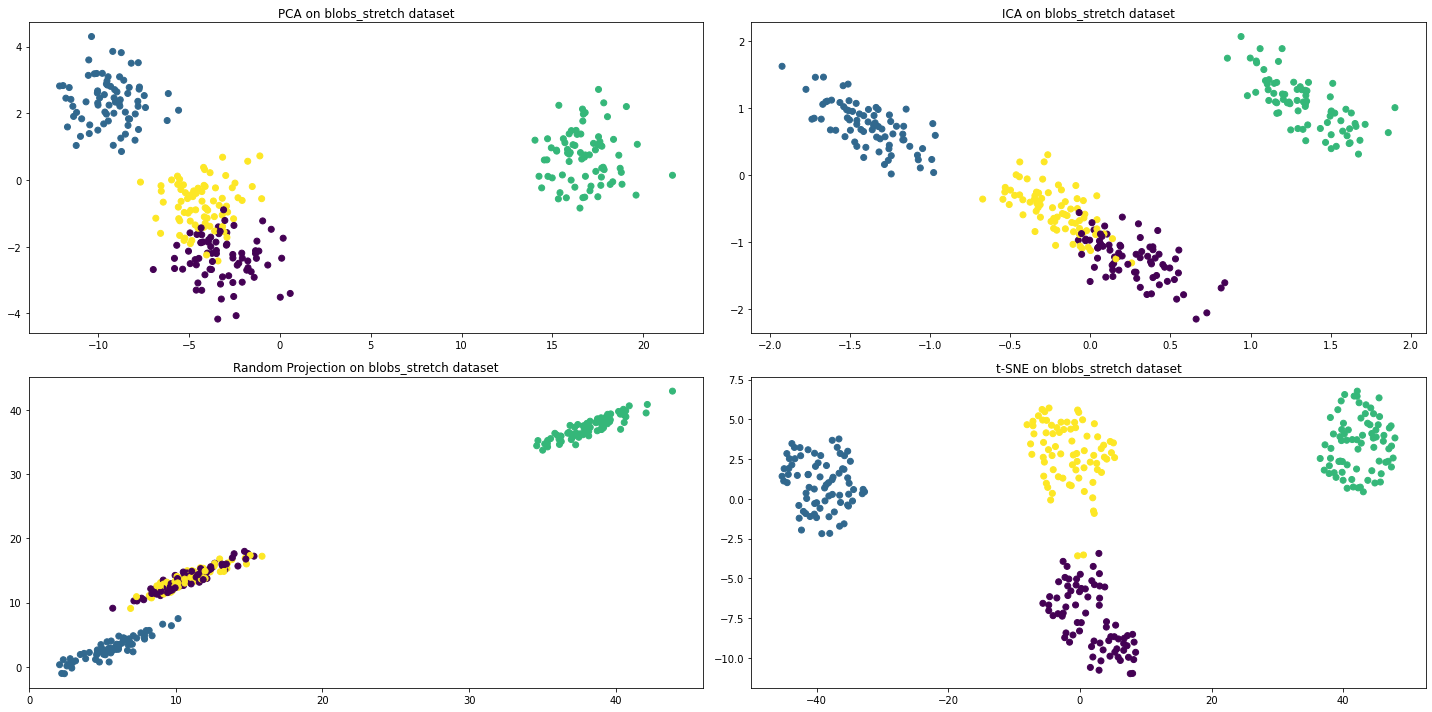

In [5]:
# Apply PCA
pca_stretch = PCA(n_components=2).fit_transform(X_stretch_3d)

# Apply ICA
ica_stretch = FastICA(n_components=2, random_state=0).fit_transform(X_stretch_3d)

# Apply Randomized Projections
rp_stretch = GaussianRandomProjection(n_components=2, random_state=0).fit_transform(X_stretch_3d)

# Apply t-SNE
tsne_stretch = TSNE(n_components=2, random_state=0).fit_transform(X_stretch_3d)

# 绘制函数
def plot_transformed_data(X, y, title, subplot_index, total_plots, plot_rows=2):
    plt.subplot(plot_rows, total_plots // plot_rows, subplot_index)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(title)

# 设置绘图
plt.figure(figsize=(20, 10))

# 总的图数量
total_plots = 4

# 绘制PCA转换的数据
plot_transformed_data(pca_stretch, y_kmeans_3d, 'PCA on blobs_stretch dataset', 1, total_plots)

# 绘制ICA转换的数据
plot_transformed_data(ica_stretch, y_kmeans_3d, 'ICA on blobs_stretch dataset', 2, total_plots)

# 绘制随机投影转换的数据
plot_transformed_data(rp_stretch, y_kmeans_3d, 'Random Projection on blobs_stretch dataset', 3, total_plots)

# 绘制t-SNE转换的数据
plot_transformed_data(tsne_stretch, y_kmeans_3d, 't-SNE on blobs_stretch dataset', 4, total_plots)

# 显示所有绘图
plt.tight_layout()
plt.show()

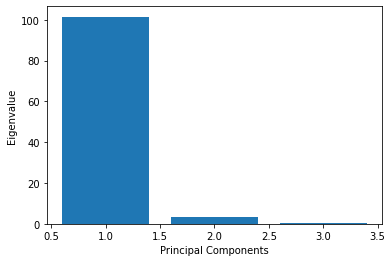

Cumulative explained variance ratios: [0.96212458 0.99554903 1.        ]
Number of components to retain for 95% explained variance: 1


In [8]:
# Apply PCA
pca = PCA()
pca.fit(X_stretch_3d)

# Eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Plot the eigenvalues
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.show()

# Calculate and print the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance ratios:", cumulative_variance_ratio)

# Determine the number of components to retain
n_components_to_retain = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components to retain for 95% explained variance: {n_components_to_retain}")

# Now you could redo PCA with the optimal number of components
pca_optimized = PCA(n_components=n_components_to_retain)
X_pca_optimized = pca_optimized.fit_transform(X_stretch_3d)

Independent Component 1 has kurtosis: -0.997
Independent Component 2 has kurtosis: -1.262


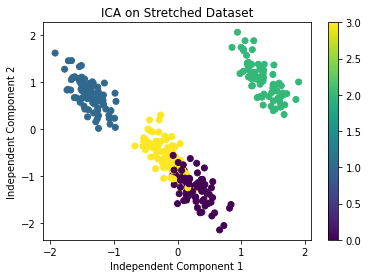

In [10]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

# Apply ICA to the stretched dataset
ica = FastICA(n_components=2, random_state=0)
ica_stretch = ica.fit_transform(X_stretch_3d)

# Calculate the kurtosis for each independent component
kurtosis_vals = kurtosis(ica_stretch, fisher=True, axis=0)  # Fisher's definition: True for excess kurtosis

# Examine whether the components are kurtotic
for i, kurt in enumerate(kurtosis_vals):
    print(f"Independent Component {i+1} has kurtosis: {kurt:.3f}")

# To analyze if the projection axes capture something meaningful:
# We would plot the independent components against each other and interpret them.
plt.scatter(ica_stretch[:, 0], ica_stretch[:, 1], c=y_kmeans_3d)
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.title('ICA on Stretched Dataset')
plt.colorbar()
plt.show()

In [11]:
def plot_for_both_methods(X_stretch, y_kmeans, data_name):
    kmeans = KMeans(n_clusters=centers, random_state=0)
    gmm = GaussianMixture(n_components=centers, n_init=20)
    
    # 对两个数据集应用K-means聚类
    y_stretch_kmeans = kmeans.fit_predict(X_stretch)
    
    print(data_name, 'K-mean for GMM Data: Homogeneity score = %.3f' % metrics.homogeneity_score(y_kmeans, y_stretch_kmeans))
    print(data_name, 'K-mean for GMM Data: Completeness score = %.3f' % metrics.completeness_score(y_kmeans, y_stretch_kmeans))
    print(data_name, 'K-mean for GMM Data: V-measure score = %.3f' % metrics.v_measure_score(y_kmeans, y_stretch_kmeans))


    # 对两个数据集应用GMM聚类
    y_stretch_gmm = gmm.fit_predict(X_stretch)
    print(data_name, 'GMM for GMM Data: Homogeneity score = %.3f' % metrics.homogeneity_score(y_kmeans, y_stretch_gmm))
    print(data_name, 'GMM for GMM Data: Completeness score = %.3f' % metrics.completeness_score(y_kmeans, y_stretch_gmm))
    print(data_name, 'GMM for GMM Data: V-measure score = %.3f' % metrics.v_measure_score(y_kmeans, y_stretch_gmm))


    # 绘制原始数据集和拉伸数据集的聚类结果
    fig, axs = plt.subplots(2, figsize=(12, 10))

    # 拉伸数据集使用K-means聚类结果
    axs[0].scatter(X_stretch[:, 0], X_stretch[:, 1], c=y_stretch_kmeans, s=20, alpha=0.7, edgecolors='k')
    axs[0].set_title(f'K-means on Stretched {data_name}')
    axs[0].set_xlabel('Feature 1')
    axs[0].set_ylabel('Feature 0')

    # 拉伸数据集使用GMM聚类结果
    axs[1].scatter(X_stretch[:, 0], X_stretch[:, 1], c=y_stretch_gmm, s=20, alpha=0.7, edgecolors='k')
    axs[1].set_title(f'GMM on Stretched {data_name}')
    axs[1].set_xlabel('Feature 1')
    axs[1].set_ylabel('Feature 0')

    plt.tight_layout()
    plt.show()

C:\Users\hubin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


pca_data K-mean for GMM Data: Homogeneity score = 0.749
pca_data K-mean for GMM Data: Completeness score = 0.756
pca_data K-mean for GMM Data: V-measure score = 0.752
pca_data GMM for GMM Data: Homogeneity score = 0.766
pca_data GMM for GMM Data: Completeness score = 0.795
pca_data GMM for GMM Data: V-measure score = 0.781


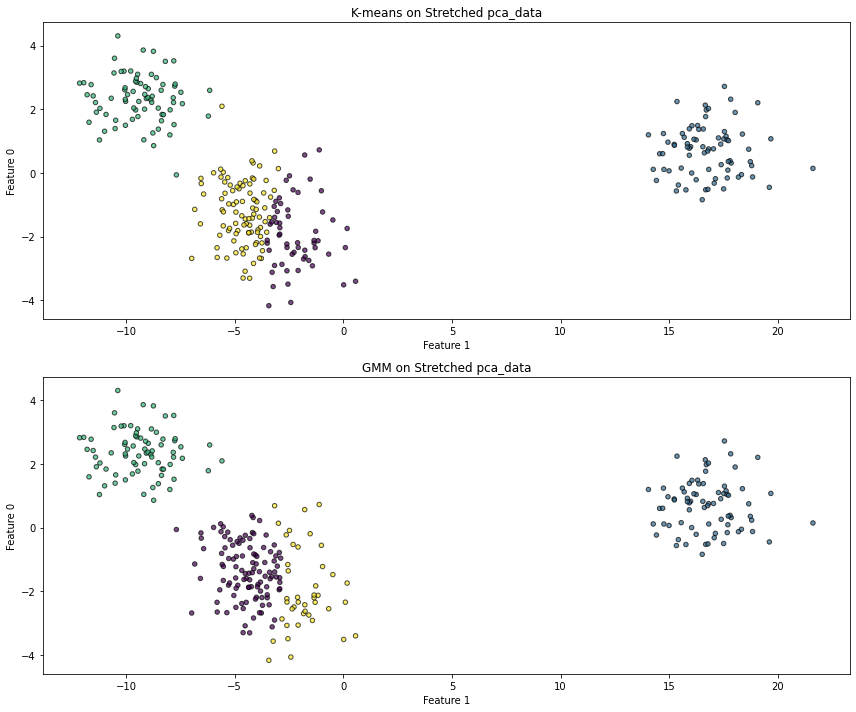

In [12]:
plot_for_both_methods(pca_stretch, y_kmeans_3d, 'pca_data')

C:\Users\hubin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ica_data K-mean for GMM Data: Homogeneity score = 0.874
ica_data K-mean for GMM Data: Completeness score = 0.874
ica_data K-mean for GMM Data: V-measure score = 0.874
ica_data GMM for GMM Data: Homogeneity score = 0.750
ica_data GMM for GMM Data: Completeness score = 0.866
ica_data GMM for GMM Data: V-measure score = 0.804


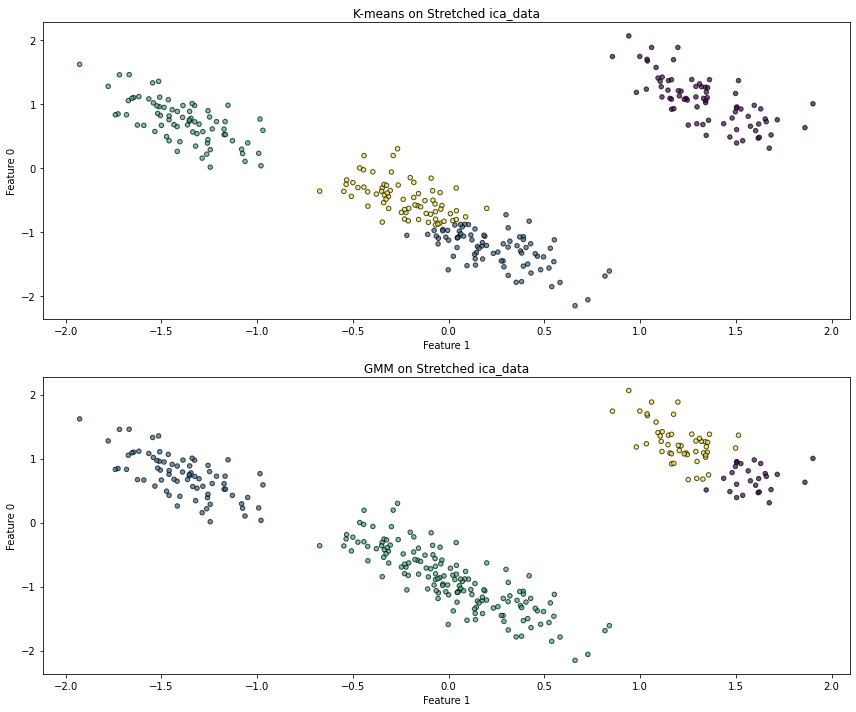

In [13]:
plot_for_both_methods(ica_stretch, y_kmeans_3d, 'ica_data')

C:\Users\hubin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


rp_data K-mean for GMM Data: Homogeneity score = 0.737
rp_data K-mean for GMM Data: Completeness score = 0.739
rp_data K-mean for GMM Data: V-measure score = 0.738
rp_data GMM for GMM Data: Homogeneity score = 0.750
rp_data GMM for GMM Data: Completeness score = 0.754
rp_data GMM for GMM Data: V-measure score = 0.752


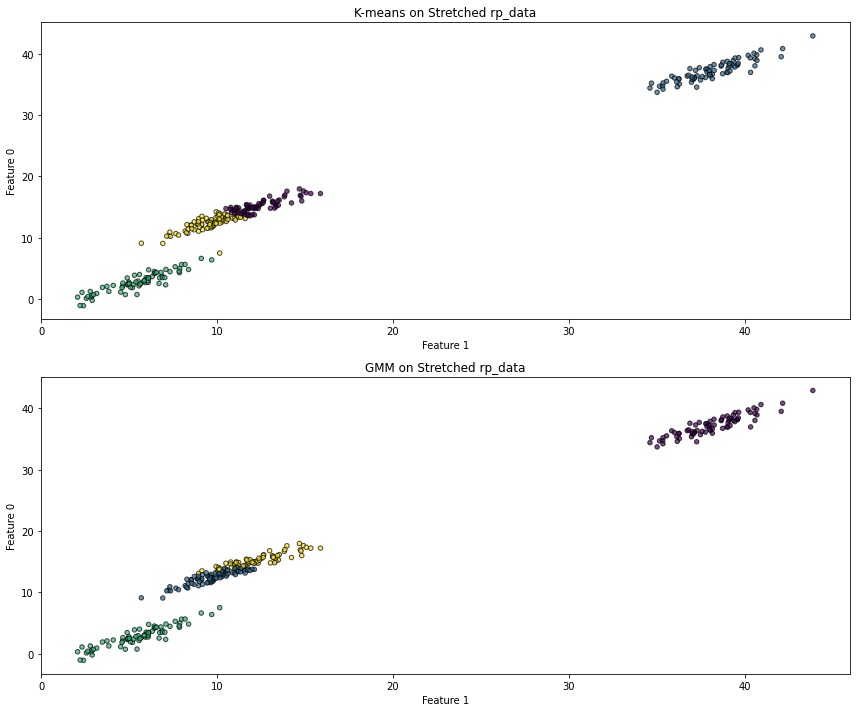

In [14]:
plot_for_both_methods(rp_stretch, y_kmeans_3d, 'rp_data')

C:\Users\hubin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


tsne_data K-mean for GMM Data: Homogeneity score = 0.978
tsne_data K-mean for GMM Data: Completeness score = 0.978
tsne_data K-mean for GMM Data: V-measure score = 0.978
tsne_data GMM for GMM Data: Homogeneity score = 0.978
tsne_data GMM for GMM Data: Completeness score = 0.978
tsne_data GMM for GMM Data: V-measure score = 0.978


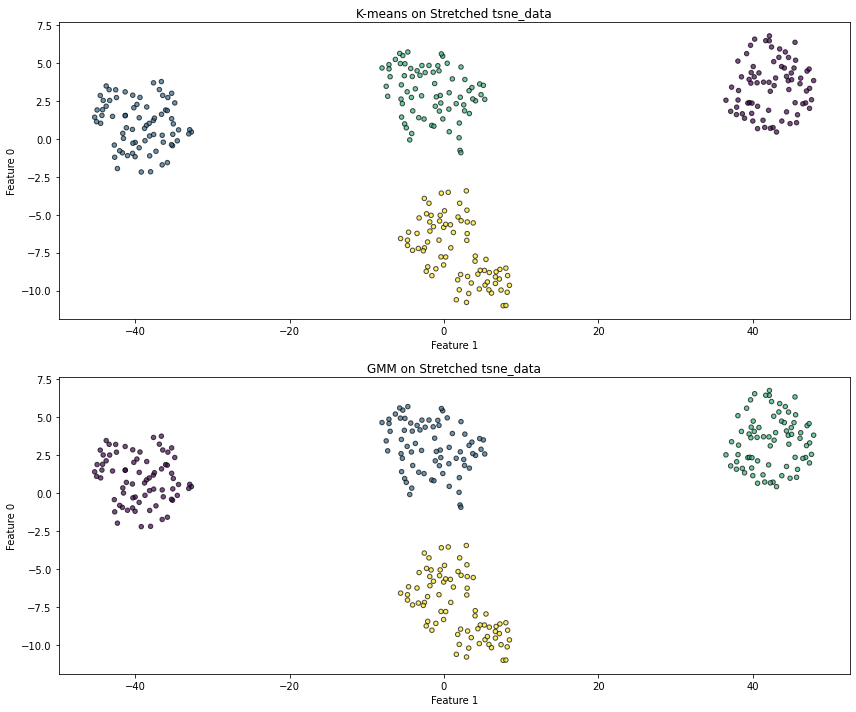

In [15]:
plot_for_both_methods(tsne_stretch, y_kmeans_3d, 'tsne_data')

In [9]:
# 使用PCA降维后的数据
X_train, X_test, y_train, y_test = train_test_split(pca_stretch, y_kmeans_3d, test_size=0.3, random_state=42)

# 定义并训练神经网络模型
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_pca.fit(X_train, y_train)

# 预测测试集
y_pred = mlp_pca.predict(X_test)

# 计算并打印性能指标
print("Performance on PCA reduced data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Performance on PCA reduced data:
Accuracy: 0.9777777777777777
Confusion Matrix:
 [[24  0  0  1]
 [ 0 22  0  0]
 [ 0  0 26  0]
 [ 1  0  0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        26
           3       0.94      0.94      0.94        17

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



In [10]:
# 使用t-SNE降维后的数据
X_train, X_test, y_train, y_test = train_test_split(tsne_stretch, y_kmeans_3d, test_size=0.3, random_state=42)

# 定义并训练神经网络模型
mlp_tsne = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_tsne.fit(X_train, y_train)

# 预测测试集
y_pred = mlp_tsne.predict(X_test)

# 计算并打印性能指标
print("Performance on t-SNE reduced data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Performance on t-SNE reduced data:
Accuracy: 1.0
Confusion Matrix:
 [[25  0  0  0]
 [ 0 22  0  0]
 [ 0  0 26  0]
 [ 0  0  0 17]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        17

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [11]:
# 将聚类标签作为新特征加入数据集
X_stretch_kmeans_feature = np.column_stack((X_stretch_3d, y_stretch_kmeans_3d))
X_stretch_gmm_feature = np.column_stack((X_stretch_3d, y_stretch_gmm_3d))

# 分割数据集为训练集和测试集
X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(X_stretch_kmeans_feature, y_kmeans_3d, test_size=0.3, random_state=42)
X_train_gmm, X_test_gmm, y_train_gmm, y_test_gmm = train_test_split(X_stretch_gmm_feature, y_kmeans_3d, test_size=0.3, random_state=42)

# 初始化神经网络模型
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# 训练模型并评估性能 - 使用K-means扩展的数据
mlp.fit(X_train_kmeans, y_train_kmeans)
y_pred_kmeans = mlp.predict(X_test_kmeans)
print('Accuracy using K-means labels as features:', accuracy_score(y_test_kmeans, y_pred_kmeans))
print("Confusion Matrix:\n", confusion_matrix(y_test_kmeans, y_pred_kmeans))
print("Classification Report:\n", classification_report(y_test_kmeans, y_pred_kmeans))

# 训练模型并评估性能 - 使用GMM扩展的数据
mlp.fit(X_train_gmm, y_train_gmm)
y_pred_gmm = mlp.predict(X_test_gmm)
print('Accuracy using GMM labels as features:', accuracy_score(y_test_gmm, y_pred_gmm))
print("Confusion Matrix:\n", confusion_matrix(y_test_gmm, y_pred_gmm))
print("Classification Report:\n", classification_report(y_test_gmm, y_pred_gmm))

Accuracy using K-means labels as features: 1.0
Confusion Matrix:
 [[25  0  0  0]
 [ 0 22  0  0]
 [ 0  0 26  0]
 [ 0  0  0 17]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        17

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

Accuracy using GMM labels as features: 1.0
Confusion Matrix:
 [[25  0  0  0]
 [ 0 22  0  0]
 [ 0  0 26  0]
 [ 0  0  0 17]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00       